# Getting Started

geosnap provides a set of tools for collecting data and constructing space-time datasets, identifying local neighborhoods or prototypical neighborhood types, modeling neighborhood change over time, and visualizing data at each step of the process.

geosnap works with data from anywhere in the world, but comes batteries-included with three decades of national US Census data, including boundaries for metropolitan statistical areas, states, counties, and tracts, and over 100 commonly used demographic and socioeconomic variables at the census-tract level. All of these data are stored as geopandas geodataframes in efficient [apache parquet](https://parquet.apache.org/) files and distributed through [quilt](https://quiltdata.com/). 

These data are available when you first import geosnap by streaming from our [quilt bucket](https://spatialucr.quiltdata.com/b/quilt-cgs) into memory. That can be useful if you dont need US data or if you just want to kick the tires, but it also means you need an internet connection to work with census data, and things may slow down depending on your network performance. For that reason, you can also use the `store_census` function to cache the data on your local machine for faster querying. This will only take around 400mb of disk space, speed up data operations, and remove the need for an internet connection.

## Using built-in data

You can access geosnap's built-in data from the `data_store` object in the data module. It contains a variable codebook as well as state, county, and MSA boundaries, in addition to boundaries and social data for three decades of census tracts. If you have stored an existing longitudinal database such as LTDB or the Geolytics Neighborhood Change Database, it will be available in the data store as well.

In [1]:
from geosnap.data import data_store

In [2]:
dir(data_store)

['codebook',
 'counties',
 'ltdb',
 'msa_definitions',
 'msas',
 'ncdb',
 'states',
 'tracts_1990',
 'tracts_2000',
 'tracts_2010']

Everything in `data_store` is a pandas (or geopandas) geo/dataframe. To access any of the data inside, just call the appropriate attribute/method (most datasets are methods). For example, to accesss the codebook which outlines each variable in the data store, incuding its name, description, the original census sources/variable names and the formula used to calculate it, you simply call `data_store.codebook`. We support the same variable set the Longitudinal Tract Database (LTDB).

In [3]:
data_store.codebook.tail()

,variable,label,formula,ltdb,ncdb,census_1990_form,census_1990_table_column,census_2000_form,census_2000_table_column,acs,category,notes
189,p_poverty_rate_black,percentage of blacks in poverty,p_poverty_rate_black=n_poverty_black / n_pover...,pbpov,BLKPR,NaN,NaN,NaN,NaN,NaN,Socioeconomic Status,NaN
190,p_poverty_rate_hispanic,percentage of Hispanics in poverty,p_poverty_rate_hispanic=n_poverty_hispanic / n...,phpov,NaN,NaN,NaN,NaN,NaN,NaN,Socioeconomic Status,NaN
191,p_poverty_rate_native,percentage of Native Americans in poverty,p_poverty_rate_native=n_poverty_native / n_pov...,pnapov,NaN,NaN,NaN,NaN,NaN,NaN,Socioeconomic Status,NaN
192,p_poverty_rate_asian,percentage of Asian and Pacific Islanders in p...,p_poverty_rate_asian=n_poverty_asian / n_pover...,papov,RASPR,NaN,NaN,NaN,NaN,NaN,Socioeconomic Status,NaN
193,n_total_pop,total population,NaN,pop,TRCTPOP,SF1,P0010001,SF1,P001001,B01001_001E,total population,NaN


You can also take a look at the dataframes themselves or plot them as quick choropleth maps

In [4]:
data_store.tracts_2000().head()

,geoid,median_contract_rent,median_home_value,median_household_income,median_income_asianhh,median_income_blackhh,median_income_hispanichh,median_income_whitehh,n_age_5_older,n_asian_age_distribution,...,p_vacant_housing_units,p_veterans,p_vietnamese_persons,p_white_over_60,p_white_over_65,p_white_under_15,p_widowed_divorced,per_capita_income,year,geometry
0,01071950100,248,58000,31028,0,0,51250,30631,5792,7,...,10.47,8.85,0.03,15.38,10.54,20.31,18.69,13445,2000,"POLYGON ((-85.659972 34.755957, -85.660201 34...."
1,01071950200,281,56600,29519,0,25446,29063,30995,3618,9,...,10.30,10.36,0.00,18.57,13.48,17.32,25.19,16321,2000,"POLYGON ((-85.771604 34.917734, -85.772938 34...."
2,01071950300,209,52700,32340,31250,20972,23182,34021,5899,12,...,12.60,8.31,0.00,16.19,11.71,16.84,22.63,15718,2000,"POLYGON ((-86.02624400000001 34.783033, -86.02..."
3,01071950400,229,51000,33328,28750,0,16250,33442,2302,3,...,15.36,8.35,0.00,16.46,11.32,21.32,16.54,13755,2000,"POLYGON ((-86.32297199999999 34.741224, -86.32..."
4,01071950500,233,70100,35319,0,65417,0,35446,3216,2,...,7.91,10.68,0.00,16.09,11.52,19.24,16.02,15556,2000,"POLYGON ((-86.171466 34.621673, -86.1737300000..."


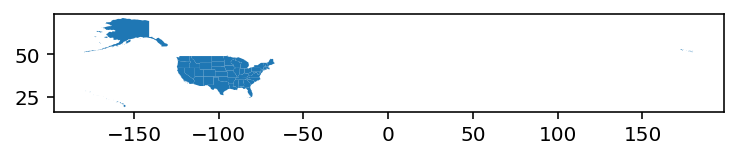

In [5]:
data_store.states().plot()

In [6]:
from matplotlib import pyplot as plt

(-77.1302772, -76.89887680000001, 38.781471749999994, 39.00528325)

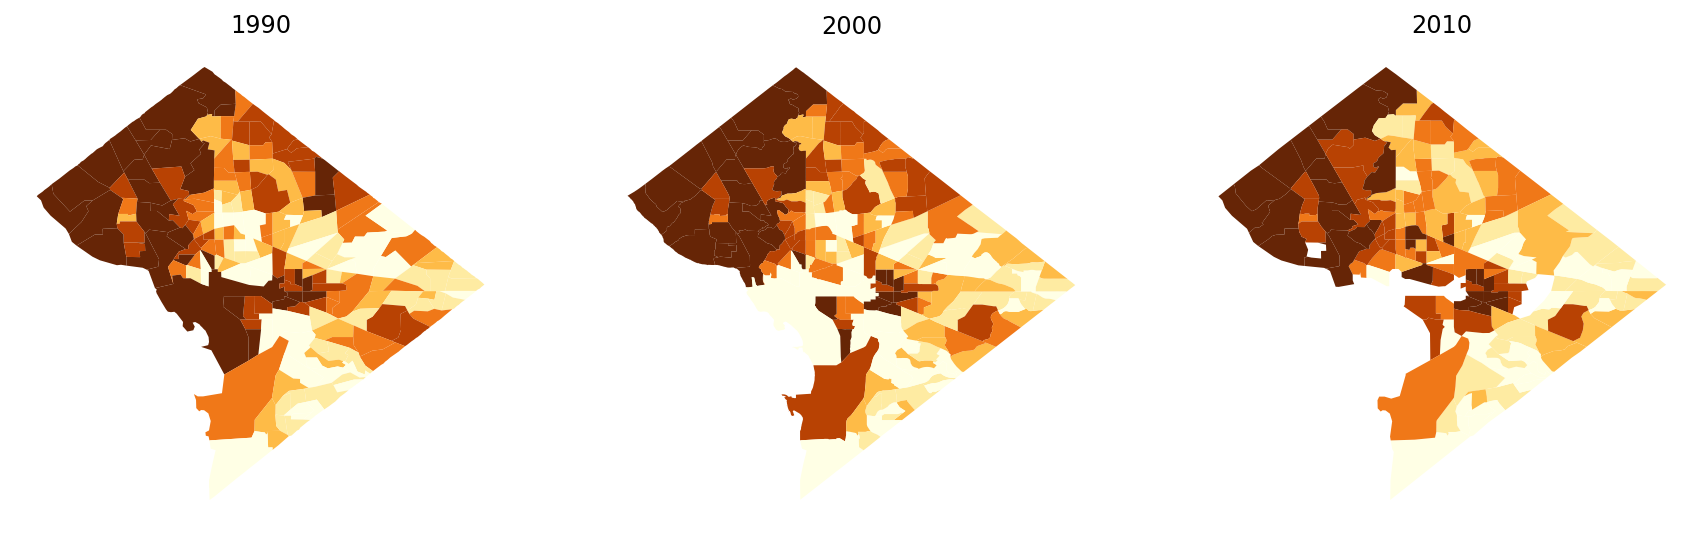

In [7]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs = axs.flatten()

data_store.tracts_1990()[data_store.tracts_1990().geoid.str.startswith('11')].dropna(subset=['median_household_income']).plot(column='median_household_income', cmap='YlOrBr', k=6, scheme='quantiles', ax=axs[0])
axs[0].set_title(1990)
axs[0].axis('off')

data_store.tracts_2000()[data_store.tracts_2000().geoid.str.startswith('11')].dropna(subset=['median_household_income']).plot(column='median_household_income', cmap='YlOrBr', k=6, scheme='quantiles', ax=axs[1])
axs[1].set_title(2000)
axs[1].axis('off')

data_store.tracts_2010()[data_store.tracts_2010().geoid.str.startswith('11')].dropna(subset=['median_household_income']).plot(column='median_household_income', cmap='YlOrBr', k=6, scheme='quantiles', ax=axs[2])
axs[2].set_title(2010)
axs[2].axis('off')


As mentioned above, you save these data locally for better performance using `geosnap.data.store_census`, which will download two quilt packages totaling just over 400mb (which is an exceedingly small file size, when you consider how much data are packed into those files). Once data are stored locally, you won't need this function again unless you want to update your local package to the most recent version on quilt.

In [8]:
from geosnap.data import store_census
store_census()

Copying: 100%|██████████| 327M/327M [01:56<00:00, 2.81MB/s]    
Copying: 100%|██████████| 86.1M/86.1M [00:14<00:00, 6.10MB/s]  


Using geosnap's built-in data, researchers can get a jumpstart on neighborhood analysis with US tract data, but census tracts are not without their drawbacks. Many of geosnap's analytics require that neighborhood units remain consistent and stable in a study area over time (how can you analyze neighborhood change if your neighborhoods are different in each time period?), but with each new decennial census, tracts are redrawn according to population fluctuations. Geosnap offers two methods for dealing with this challenge.

First, geosnap can create its own set of stable longitudinal units of analysis and convert raw census or other data into those units. Its `harmonize` module provides tools for researchers to define a set of geographic units and interpolate data into those units using moden spatial statistical methods. This is a good option for researchers who are interested in the ways that different interpolation methods can affect their analyses or those who want to use state-of-the-art methods to create longitudinal datasets that are more accurate than those provided by existing databases.

Second, geosnap can simply leverage existing data that has already been standardized into a set of consistent units. The `data` module provides tools for reading and storing existing longitudinal databases that, once ingested, will be available in the data store and can be queried and analyzed repeatedly. This is a good option for researchers who want to get started modeling neighborhood characteristics right away and are less interested in exploring how error propagates through spatial interpolation.   

## Storing Data from External Databases

The quickest way to get started with geosnap is by importing pre-harmonized census data from either the [Longitudinal Tract Database
(LTDB)](https://s4.ad.brown.edu/projects/diversity/Researcher/LTDB.htm) created by researchers from Brown University or the [Neighborhood Change Database](http://www.geolytics.com/USCensus,Neighborhood-Change-Database-1970-2000,Products.asp) created by the consulting company Geolytics. While licensing restrictions prevent either of these databases from being distributed inside geosnap, LTDB is nonetheless *free*. As such, we recommended importing LTDB data before getting started with geosnap

### Longitudinal Tract Database (LTDB)

The [Longitudinal Tract Database
(LTDB)](https://s4.ad.brown.edu/projects/diversity/Researcher/LTDB.htm) is a
freely available dataset developed by researchers at Brown University that
provides 1970-2010 census data harmonized to 2010 boundaries.

To store LTDB data and make it available to geosnap, proceed with the following:

1. Download the raw data from the LTDB [downloads
  page](https://s4.ad.brown.edu/projects/diversity/Researcher/LTBDDload/Default.aspx).
  Note that to construct the entire database you will need two archives: one
  containing the sample variables, and another containing the "full count"
  variables.
    - Use the dropdown menu called **select file type** and choose "full"; in
      the dropdown called **select a year**, choose "All Years"
    - Click the button "Download Standard Data Files"
    - Repeat the process, this time selecting "sample" in the **select file
      type** menu and "All years" in the **select a year** dropdown
2. Note the location of the two zip archives you downloaded. By default they are called 
    - `LTDB_Std_All_Sample.zip` and
    - `LTDB_Std_All_fullcount.zip`

3. Start ipython/jupyter, import geosnap, and call the `store_ltdb` function with the paths of the two zip archives you downloaded from the LTDB project page:


In [9]:
from geosnap.data import store_ltdb

# if the archives were in my downloads folder, the paths might be something like this
sample = "/Users/knaaptime/Downloads/LTDB_Std_All_Sample.zip"
full = "/Users/knaaptime/Downloads/LTDB_Std_All_fullcount.zip"

store_ltdb(sample=sample, fullcount=full)

Hashing: 100%|██████████| 300M/300M [00:02<00:00, 131MB/s]  


That function will extract the necessary data from the archives, calculate additional variables using formulas from the codebook, create a new local quilt package for storing the data, and register the database with the `data_store`. After the function has run, you will be able to access the LTDB data as a long-form geodataframe by calling the `ltdb` attribute from the data store. As with the `store_census` function above, this only needs to be run a single time to save the data as a local quit package and register it with geosnap. You won't neeed to store the data again unless there's an update to the variable formulas in the codebook.

In [10]:
data_store.ltdb.head()

,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,n_native_over_60,...,n_white_persons,year,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled
geoid,,,,,,,,,,,,,,,,,,,,,
01001020500,NaN,1.121662,NaN,NaN,1.802740,3.284181,NaN,0.301098,NaN,NaN,...,5.794934,1970,2.166366,NaN,6.433142,3.514090,NaN,NaN,NaN,4.737847
01003010100,NaN,609.000000,NaN,NaN,639.000000,1407.000000,NaN,221.000000,NaN,NaN,...,2003.999981,1970,1106.000000,NaN,8.299712,6.368876,NaN,NaN,NaN,5.821326
01003010200,NaN,37.567365,NaN,NaN,564.014945,686.748041,NaN,27.861793,NaN,NaN,...,1757.910752,1970,619.433984,NaN,13.313281,1.480888,NaN,NaN,NaN,6.248800
01003010300,NaN,374.853457,NaN,NaN,981.543199,1523.971872,NaN,103.848314,NaN,NaN,...,2835.404427,1970,1025.805309,NaN,8.023381,2.788906,NaN,NaN,NaN,7.214156
01003010400,NaN,113.203816,NaN,NaN,796.944763,1029.919527,NaN,37.127235,NaN,NaN,...,2323.133371,1970,780.370269,NaN,11.072073,1.427952,NaN,NaN,NaN,11.205555


### Geolytics Neighborhood Change Database

The Neighborhood Change Database (ncdb) is a commercial database created by Geolytics and the Urban Institute. Like LTDB, it provides census data harmonized to 2010 tracts. NCDB data must be purchased from Geolytics prior to use. If you have a license, you can import NCDB into geosnap with the following:

1. Open the Geolytics application
2. Choose "New Request":   
![Choose "New Request"](https://raw.githubusercontent.com/spatialucr/geosnap/master/geosnap/doc/figs/geolytics_interface1.PNG)
3. Select CSV or DBF
4. Make the following Selections:
    - **year**: all years in 2010 boundaries
    - **area**: all census tracts in the entire united states
    - **counts**: [right click] Check All Sibling Nodes

![](https://raw.githubusercontent.com/spatialucr/geosnap/master/geosnap/doc/figs/geolytics_interface2.PNG)

5. Click `Run Report`

6. Note the name and location of the CSV you created

7. Start ipython/jupyter, import geosnap, and call the `store_ncdb` function with the path of the CSV:


In [ ]:
from geosnap.data import store_ncdb

ncdb_path = "~/Downloads/ncdb.csv"

# note this will raise several warnings since NCDB does not contain all the underlying data necessary to calculate all the variables in the codebook
store_ncdb(ncdb_path)

As with above, you can access the geolytics data through the `ncdb` attribute of the `data_store`

In [12]:
data_store.ncdb.head()

,year,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_foreign_born_pop,n_naturalized_pop,p_foreign_born_pop,n_total_housing_units,n_vacant_housing_units,n_occupied_housing_units,...,p_vacant_housing_units,p_owner_occupied_units,p_persons_under_18,p_married,p_female_headed_families,p_nonhisp_white_persons,p_employed_professional,p_employed_manufacturing,p_poverty_rate_hispanic,p_poverty_rate_native
geoid,,,,,,,,,,,,,,,,,,,,,
01001020100,1980,0,0.0,0,9.0,NaN,0.528790,555,43,511,...,7.747748,92.072072,NaN,inf,NaN,91.363102,NaN,NaN,NaN,0.0
01001020100,1990,0,0.0,0,0.0,NaN,0.000000,697,45,651,...,6.456241,93.400287,NaN,30.506058,NaN,99.301075,NaN,NaN,NaN,0.0
01001020100,2000,0,0.0,0,0.0,0.0,0.000000,741,81,659,...,10.931174,88.933873,NaN,31.743869,NaN,95.527157,NaN,NaN,NaN,0.0
01001020100,2010,30,1.0,2,18.0,0.0,0.941423,752,59,693,...,7.845745,92.154255,NaN,30.960157,NaN,84.205021,NaN,NaN,NaN,NaN
01001020200,1980,7,0.0,0,22.0,NaN,1.043148,741,48,693,...,6.477733,93.522267,NaN,24.094799,NaN,38.454244,NaN,NaN,NaN,0.0
